#Import packages and images


## Kaggle setup and dataset download

In [ ]:
! pip install kaggle



In [ ]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.layers import Dense, Flatten, Dropout, RandomZoom, RandomContrast, RandomRotation
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from tensorflow.keras.models import Sequential
from numpy import expand_dims, asarray
from google.colab import drive
from random import *
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
!pip install split-folders
!pip install Pillow
from PIL import Image
import splitfolders
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.20G/5.20G [00:39<00:00, 135MB/s]
100% 5.20G/5.20G [00:39<00:00, 143MB/s]


In [ ]:
!unzip -q skin-cancer-mnist-ham10000.zip -d skin_cancer_data

In [ ]:
# Define paths for train, validation, and test sets
base_path = '/content/skin_cancer_data'  # Adjust this path as needed
train_path = os.path.join(base_path, 'Train')
val_path = os.path.join(base_path, 'Val')
test_path = os.path.join(base_path, 'Test')

# Create directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Load metadata CSV file
metadata = pd.read_csv(os.path.join(base_path, 'HAM10000_metadata.csv'))

# Extract image names and their corresponding labels (diagnosis)
image_ids = metadata['image_id'].values
labels = metadata['dx'].values  # 'dx' column contains diagnosis labels



In [ ]:
source_folder = '/content/drive/MyDrive/Dr.Derma/SkincancerISICTheInternationalSkinImagingCollaboration/Train/dermatofibroma'
destination_folder = '/content/skin_cancer_data/Train/df'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy all files from source to destination
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)

    if os.path.isfile(source_path):  # Check if it's a file
        shutil.copy(source_path, destination_path)



In [ ]:
source_folder = '/content/drive/MyDrive/Dr.Derma/SkincancerISICTheInternationalSkinImagingCollaboration/Train/melanoma'
destination_folder = '/content/skin_cancer_data/Train/mel'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy all files from source to destination
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)

    if os.path.isfile(source_path):  # Check if it's a file
        shutil.copy(source_path, destination_path)

In [ ]:
source_folder = '/content/drive/MyDrive/Dr.Derma/SkincancerISICTheInternationalSkinImagingCollaboration/Train/basalcellcarcinoma'
destination_folder = '/content/skin_cancer_data/Train/bcc'


# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy all files from source to destination
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)

    if os.path.isfile(source_path):  # Check if it's a file
        shutil.copy(source_path, destination_path)

In [ ]:
source_folder = '/content/drive/MyDrive/Dr.Derma/SkincancerISICTheInternationalSkinImagingCollaboration/Train/vascularlesion'
destination_folder = '/content/skin_cancer_data/Train/vasc'


# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy all files from source to destination
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)

    if os.path.isfile(source_path):  # Check if it's a file
        shutil.copy(source_path, destination_path)

In [ ]:
source_folder = '/content/drive/MyDrive/Dr.Derma/SkincancerISICTheInternationalSkinImagingCollaboration/Train/actinickeratosis'
destination_folder = '/content/skin_cancer_data/Train/akiec'


# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy all files from source to destination
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)

    if os.path.isfile(source_path):  # Check if it's a file
        shutil.copy(source_path, destination_path)

In [ ]:
# Split data into 70% training, 15% validation, and 15% test sets
train_ids, temp_ids, train_labels, temp_labels = train_test_split(image_ids, labels, test_size=0.30, random_state=42)

# Split temp_ids into 50% validation and 50% test sets
val_ids, test_ids, val_labels, test_labels = train_test_split(temp_ids, temp_labels, test_size=0.50, random_state=42)

print(f"Training set: {len(train_ids)} images")
print(f"Validation set: {len(val_ids)} images")
print(f"Test set: {len(test_ids)} images")

# Define source folders where all images are stored
image_folders = [
    os.path.join(base_path, 'HAM10000_images_part_1'),
    os.path.join(base_path, 'HAM10000_images_part_2')
]

# Function to find and move images from multiple source folders
def move_images(image_list, destination_folder):
    for img_id in image_list:
        img_filename = f"{img_id}.jpg"  # Adjust extension if necessary (e.g., '.jpeg')
        found = False

        # Search in both image folders
        for folder in image_folders:
            src = os.path.join(folder, img_filename)
            if os.path.exists(src):
                dst = os.path.join(destination_folder, img_filename)
                shutil.move(src, dst)
                found = True
                break

        if not found:
            print(f"Warning: {img_filename} not found in any folder.")

# Move training images
move_images(train_ids, train_path)

# Move validation images
move_images(val_ids, val_path)

# Move test images
move_images(test_ids, test_path)

print("Images have been successfully moved to Train/Val/Test folders.")

Training set: 7010 images
Validation set: 1502 images
Test set: 1503 images
Images have been successfully moved to Train/Val/Test folders.


In [ ]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
NUM_EPOCHS = 30

In [ ]:
# Load metadata
metadata_path = '/content/skin_cancer_data/HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Display first few rows of metadata
print(metadata.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [ ]:
# Create a dictionary mapping image IDs to their class labels
image_to_class = dict(zip(metadata['image_id'], metadata['dx']))

# Example: Get class label for a specific image
img_id = 'ISIC_0027256'  # Example image ID
class_label = image_to_class[img_id]
print(f"Class label for {img_id}: {class_label}")

Class label for ISIC_0027256: vasc


In [ ]:
# Define base paths
train_path = '/content/skin_cancer_data/Train'
val_path = '/content/skin_cancer_data/Val'
test_path = '/content/skin_cancer_data/Test'

# Create directories for each class in Train, Val, and Test folders
classes = metadata['dx'].unique()

for dataset_path in [train_path, val_path, test_path]:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, cls), exist_ok=True)

# Move images into corresponding class folders based on metadata
for dataset_path in [train_path, val_path, test_path]:
    for img_name in os.listdir(dataset_path):
        if img_name.endswith('.jpg'):
            img_id = img_name.split('.')[0]  # Remove .jpg extension to get image ID
            if img_id in image_to_class:
                cls = image_to_class[img_id]  # Get class label from metadata
                src = os.path.join(dataset_path, img_name)
                dst = os.path.join(dataset_path, cls, img_name)  # Destination folder based on class label
                shutil.move(src, dst)
                print(f"Moved {img_name} to {cls} folder.")
            else:
                print(f"Image {img_name} not found in metadata.")

Streaming output truncated to the last 5000 lines.
Moved ISIC_0026214.jpg to nv folder.
Moved ISIC_0026226.jpg to nv folder.
Moved ISIC_0029344.jpg to nv folder.
Moved ISIC_0031867.jpg to nv folder.
Moved ISIC_0028279.jpg to nv folder.
Moved ISIC_0025228.jpg to nv folder.
Moved ISIC_0034050.jpg to mel folder.
Moved ISIC_0033362.jpg to mel folder.
Moved ISIC_0028091.jpg to nv folder.
Moved ISIC_0033045.jpg to nv folder.
Moved ISIC_0028152.jpg to nv folder.
Moved ISIC_0033050.jpg to mel folder.
Moved ISIC_0029673.jpg to nv folder.
Moved ISIC_0031527.jpg to bcc folder.
Moved ISIC_0029351.jpg to nv folder.
Moved ISIC_0028443.jpg to nv folder.
Moved ISIC_0029810.jpg to bkl folder.
Moved ISIC_0032521.jpg to nv folder.
Moved ISIC_0034028.jpg to mel folder.
Moved ISIC_0030043.jpg to nv folder.
Moved ISIC_0033955.jpg to nv folder.
Moved ISIC_0028776.jpg to nv folder.
Moved ISIC_0026620.jpg to nv folder.
Moved ISIC_0028372.jpg to akiec folder.
Moved ISIC_0025761.jpg to nv folder.
Moved ISIC_0032

Code to remove df


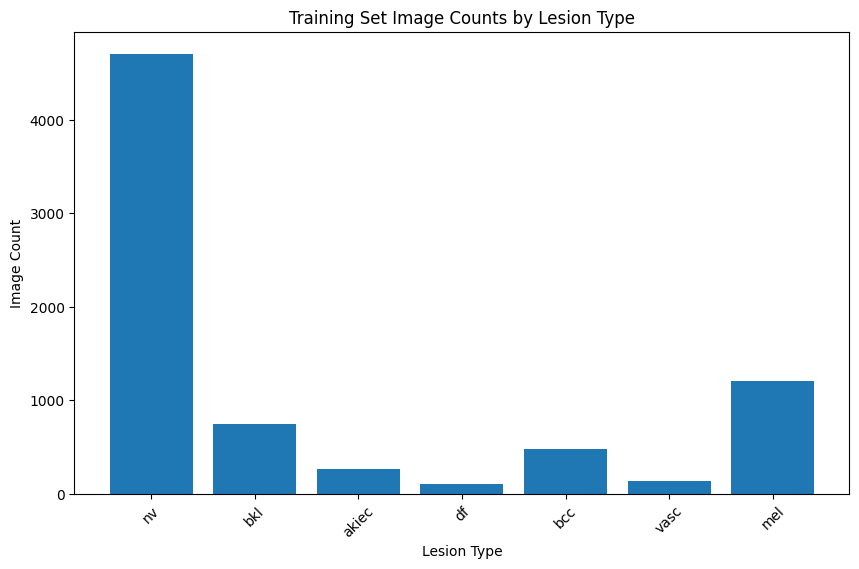

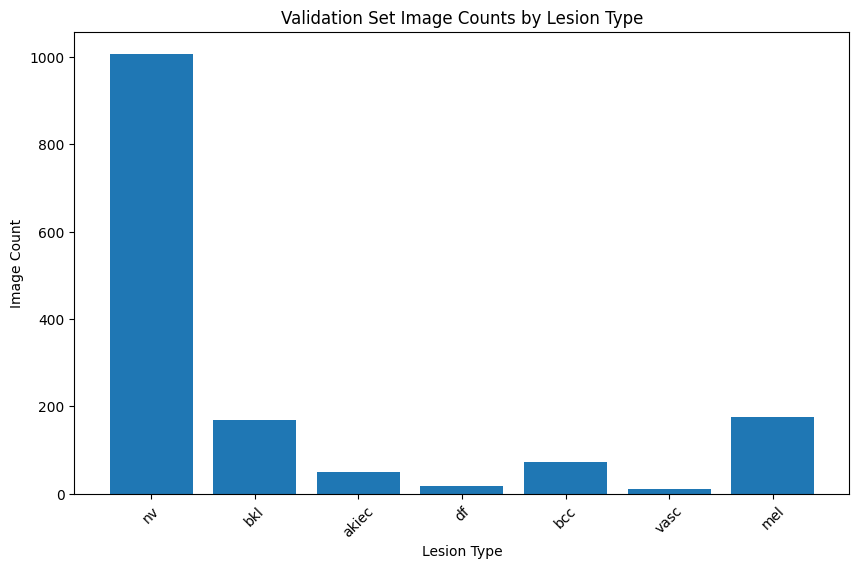

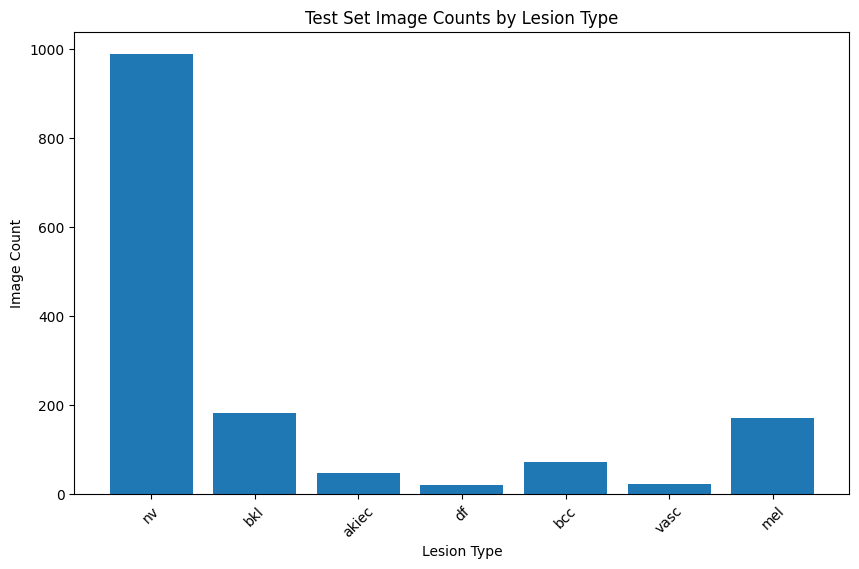

In [ ]:
def count_images_in_subfolders(dataset_path):
    class_counts = {}
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder):  # Ensure it's a directory
            class_counts[class_name] = len(os.listdir(class_folder))
    return class_counts

train_counts = count_images_in_subfolders(train_path)
val_counts = count_images_in_subfolders(val_path)
test_counts = count_images_in_subfolders(test_path)

def plot_image_counts(counts, title):
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Lesion Type')
    plt.ylabel('Image Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_image_counts(train_counts, 'Training Set Image Counts by Lesion Type')
plot_image_counts(val_counts, 'Validation Set Image Counts by Lesion Type')
plot_image_counts(test_counts, 'Test Set Image Counts by Lesion Type')

In [ ]:
def display_image_counts(counts, dataset_name):
    print(f"Image counts in {dataset_name} set by lesion type:")
    for lesion_type, count in counts.items():
        print(f"{lesion_type}: {count}")
    print("\n")

display_image_counts(train_counts, 'Training')
display_image_counts(val_counts, 'Validation')
display_image_counts(test_counts, 'Test')

Image counts in Training set by lesion type:
nv: 4708
bkl: 749
akiec: 263
df: 105
bcc: 478
vasc: 142
mel: 1204


Image counts in Validation set by lesion type:
nv: 1007
bkl: 168
akiec: 49
df: 19
bcc: 72
vasc: 11
mel: 176


Image counts in Test set by lesion type:
nv: 990
bkl: 182
akiec: 47
df: 20
bcc: 71
vasc: 22
mel: 171




In [ ]:
# Augmentation configurations
size_augmentation = RandomZoom(0.2)
contrast_augmentation = RandomContrast(0.2)
rotation_augmentation = RandomRotation(0.2)

# Function to apply all augmentations to an image
def augment_image(np_image):
    # Apply size augmentation
    augmented_eager_tensor = size_augmentation(np_image)
    augmented_np_arr = augmented_eager_tensor.numpy()

    # Apply contrast augmentation
    augmented_eager_tensor = contrast_augmentation(augmented_np_arr)
    augmented_np_arr = augmented_eager_tensor.numpy()

    # Apply rotation augmentation
    augmented_eager_tensor = rotation_augmentation(augmented_np_arr)
    augmented_np_arr = augmented_eager_tensor.numpy()

    return augmented_np_arr

# Function to check if an image has already been augmented
def image_already_augmented(image_name, folder_path):
    return os.path.exists(os.path.join(folder_path, 'new_' + image_name))

# Process each dataset path
for dataset_path in [train_path, val_path]:
    for folder in os.listdir(dataset_path):  # Each class folder
        sub_path = os.path.join(dataset_path, folder)
        for img_name in os.listdir(sub_path):
            # Skip already augmented images
            if img_name.startswith('new_') or image_already_augmented(img_name, sub_path):
                continue

            # Open image and convert to numpy array
            pil_img = Image.open(os.path.join(sub_path, img_name))
            np_image = np.asarray(pil_img)

            # Apply augmentations
            augmented_arr = augment_image(np_image)

            # Save augmented image with "new_" prefix
            augmented_image = Image.fromarray(augmented_arr.astype(np.uint8))
            fullpath = os.path.join(sub_path, 'new_' + img_name)
            augmented_image.save(fullpath)

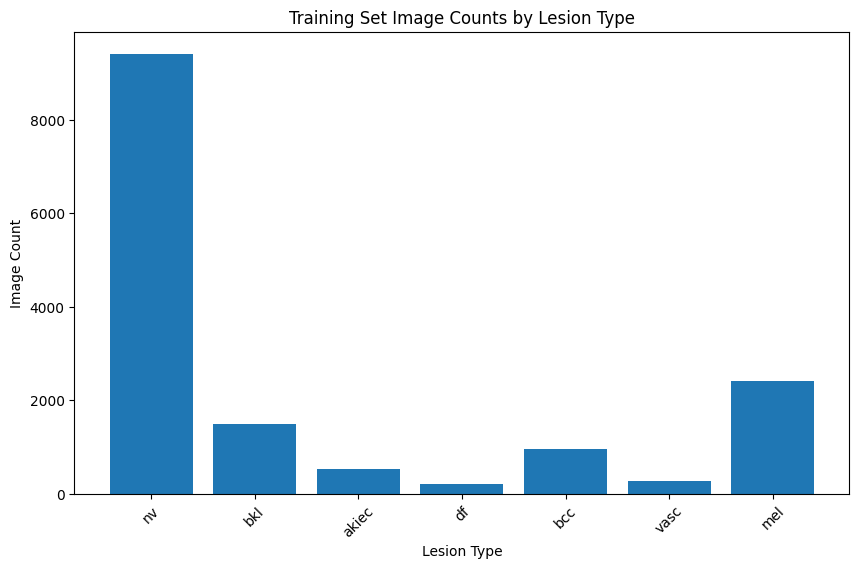

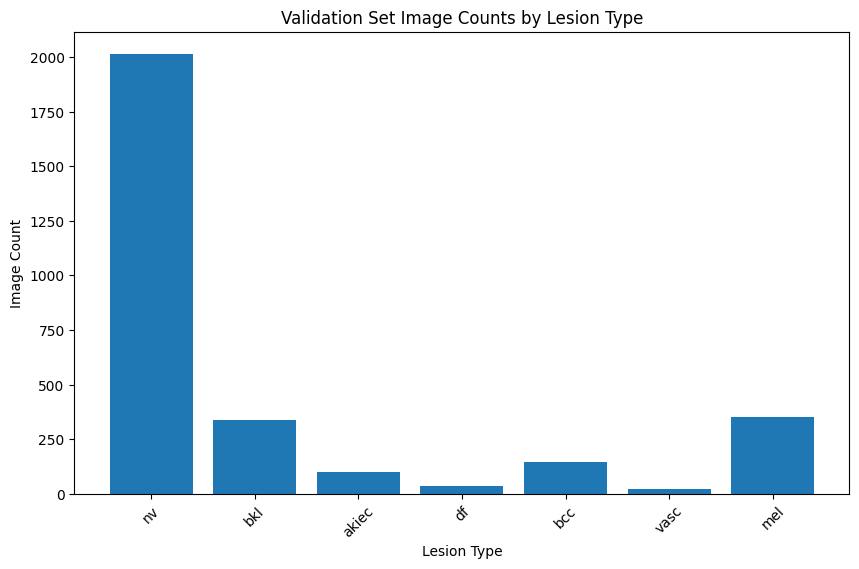

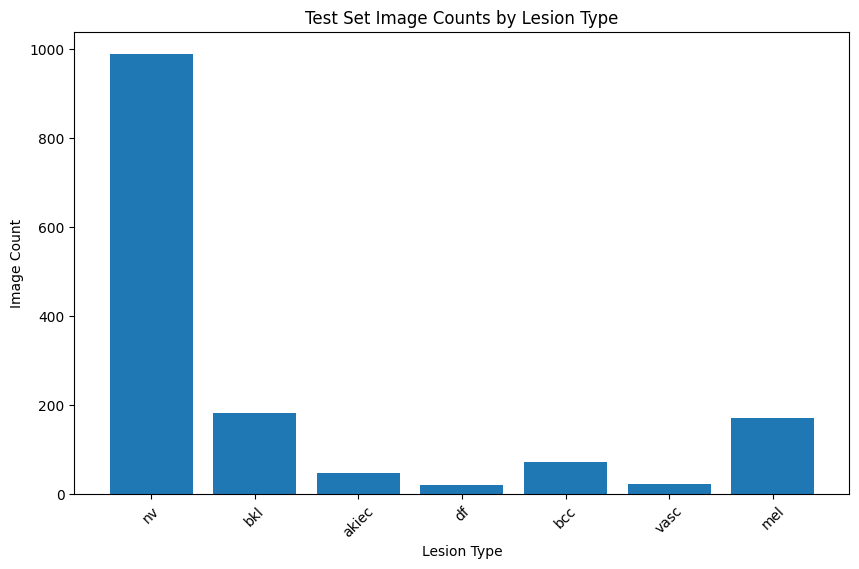

In [ ]:
def count_images_in_subfolders(dataset_path):
    class_counts = {}
    for class_name in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder):  # Ensure it's a directory
            class_counts[class_name] = len(os.listdir(class_folder))
    return class_counts

train_counts = count_images_in_subfolders(train_path)
val_counts = count_images_in_subfolders(val_path)
test_counts = count_images_in_subfolders(test_path)

def plot_image_counts(counts, title):
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Lesion Type')
    plt.ylabel('Image Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_image_counts(train_counts, 'Training Set Image Counts by Lesion Type')
plot_image_counts(val_counts, 'Validation Set Image Counts by Lesion Type')
plot_image_counts(test_counts, 'Test Set Image Counts by Lesion Type')

In [ ]:
def display_image_counts(counts, dataset_name):
    print(f"Image counts in {dataset_name} set by lesion type:")
    for lesion_type, count in counts.items():
        print(f"{lesion_type}: {count}")
    print("\n")

display_image_counts(train_counts, 'Training')
display_image_counts(val_counts, 'Validation')
display_image_counts(test_counts, 'Test')

Image counts in Training set by lesion type:
nv: 9416
bkl: 1498
akiec: 526
df: 210
bcc: 956
vasc: 284
mel: 2408


Image counts in Validation set by lesion type:
nv: 2014
bkl: 336
akiec: 98
df: 38
bcc: 144
vasc: 22
mel: 352


Image counts in Test set by lesion type:
nv: 990
bkl: 182
akiec: 47
df: 20
bcc: 71
vasc: 22
mel: 171




In [ ]:
DATAGEN = ImageDataGenerator(rescale = 1./255)


training_set = DATAGEN.flow_from_directory(train_path,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = DATAGEN.flow_from_directory(test_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

val_set = DATAGEN.flow_from_directory(val_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 15298 images belonging to 7 classes.
Found 1503 images belonging to 7 classes.
Found 3004 images belonging to 7 classes.


In [ ]:
vgg_19 = VGG19(weights='imagenet', include_top=False, input_shape = (224,224,3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
set_trainable = False
for layer in vgg_19.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import models, layers, regularizers
model = models.Sequential()
model.add(vgg_19)

model.add(layers.Flatten())

model.add(layers.Dense(256, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(6, activation='softmax'))  # Output layer for 9 classes

In [ ]:
from tensorflow.keras import optimizers, callbacks

# Compile your model with an initial learning rate
initial_learning_rate = 2e-5
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=initial_learning_rate),
    metrics=['acc']
)

# Define ReduceLROnPlateau callback to reduce learning rate when validation loss plateaus
lr_schedule = callbacks.ReduceLROnPlateau(
    monitor='val_loss',      # Monitors validation loss
    factor=0.1,              # Reduces learning rate by a factor of 10
    patience=3,              # Waits for 3 epochs without improvement
    min_lr=1e-7,             # Sets a minimum learning rate
    verbose=1                # Prints when the learning rate is reduced
)

In [ ]:
history = model.fit(
  training_set,
  steps_per_epoch = training_set.samples // 64,
  epochs = NUM_EPOCHS,
  validation_data = val_set,
  validation_steps = val_set.samples // BATCH_SIZE,
  shuffle = True
  )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


239/239 ━━━━━━━━━━━━━━━━━━━━ 66s 203ms/step - acc: 0.1639 - loss: 2.2905 - val_acc: 0.5554 - val_loss: 1.6292
Epoch 2/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 47s 199ms/step - acc: 0.4818 - loss: 1.5247 - val_acc: 0.7857 - val_loss: 0.8260
Epoch 3/30
  1/239 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - acc: 0.7188 - loss: 1.0660

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - acc: 0.7188 - loss: 1.0660 - val_acc: 0.6539 - val_loss: 1.0979
Epoch 4/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 34s 139ms/step - acc: 0.5833 - loss: 1.2755 - val_acc: 0.6786 - val_loss: 0.9458
Epoch 5/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 45s 190ms/step - acc: 0.6300 - loss: 1.1355 - val_acc: 0.6657 - val_loss: 1.0298
Epoch 6/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - acc: 0.6250 - loss: 1.1446 - val_acc: 0.7857 - val_loss: 0.8028
Epoch 7/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 47s 192ms/step - acc: 0.6380 - loss: 1.0956 - val_acc: 0.6747 - val_loss: 0.9738
Epoch 8/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 33s 139ms/step - acc: 0.6450 - loss: 1.0476 - val_acc: 0.7857 - val_loss: 0.7286
Epoch 9/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - acc: 0.5938 - loss: 1.0517 - val_acc: 0.6858 - val_loss: 0.9368
Epoch 10/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 34s 139ms/step - acc: 0.6772 - loss: 0.9734 - val_acc: 0.7500 - val_loss: 0.8762
Epoch 11/30
239/239 ━━━━━━━━━━━━━━━━━━━━ 45s 

In [ ]:
def plot_acc_loss(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

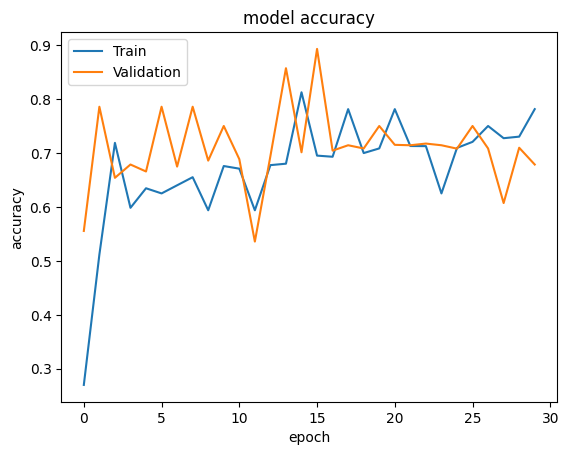

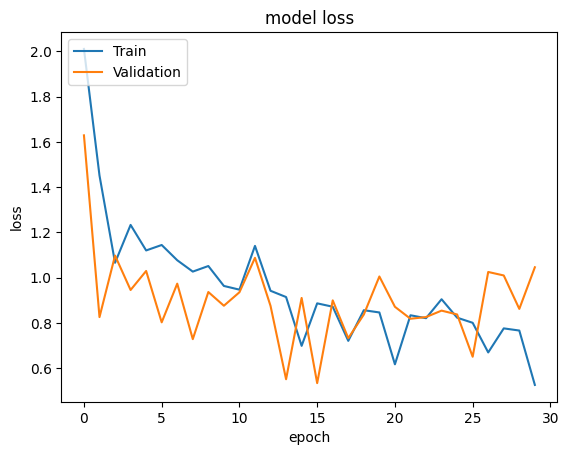

In [ ]:
plot_acc_loss(history)

In [ ]:
test_loss, test_acc = model.evaluate(test_set, steps=test_set.samples // BATCH_SIZE)
print(f"Test Accuracy before fine tuning: {test_acc*100:.2f} %")

46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - acc: 0.7153 - loss: 0.8591
Test Accuracy before fine tuning: 72.08 %


In [ ]:
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_set.classes

cm = confusion_matrix(true_classes, predicted_classes)

47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 426ms/step


Found 1503 images belonging to 7 classes.
Found 15298 images belonging to 7 classes.
  1/479 ━━━━━━━━━━━━━━━━━━━━ 1:48 227ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


479/479 ━━━━━━━━━━━━━━━━━━━━ 71s 148ms/step


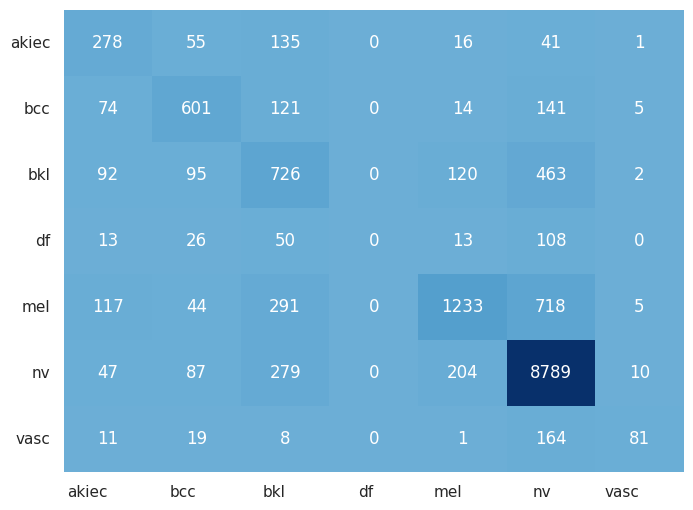

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define class names based on HAM10000 metadata (abbreviations used in metadata)
class_names = {
    "akiec": "actinic keratosis",
    "bcc": "basal cell carcinoma",
    "bkl": "benign keratosis",
    "df": "dermatofibroma",
    "mel": "melanoma",
    "nv": "nevus",
    "vasc": "vascular lesion",
}
abbreviated_class_names = list(class_names.keys())

# Load test data using ImageDataGenerator
image_size = (224, 224)  # Adjust based on your model's input size
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    '/content/skin_cancer_data/Test',  # Path to Test folder with images
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Don't shuffle so predictions match true labels order
)

train_set = test_datagen.flow_from_directory(
    '/content/skin_cancer_data/Train',  # Path to Test folder with images
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Don't shuffle so predictions match true labels order
)

# Generate predictions for the test set
predictions = model.predict(train_set)

# Get predicted class indices (argmax returns index of max probability)
predicted_classes = np.argmax(predictions, axis=1)

# Get true class indices from the test set
true_classes = train_set.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix as a heatmap with white text for annotations
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.0, style="white")

sns.heatmap(
    cm, fmt="g", center=True, cbar=False, annot=True, cmap="Blues",
    xticklabels=abbreviated_class_names, yticklabels=abbreviated_class_names,
    annot_kws={"color": "white"}
)

plt.xticks(rotation=0, ha="right")
plt.yticks(rotation=0)

plt.show()

In [ ]:
vgg_19.trainable = True

set_trainable = False
for layer in vgg_19.layers:
    if layer.name=='block5_conv1':
        set_trainable = True
    if set_trainable == True:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
from tensorflow.keras import optimizers, callbacks

# Compile your model with an initial learning rate
initial_learning_rate = 2e-5
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=initial_learning_rate),
    metrics=['acc']
)

# Define ReduceLROnPlateau callback to reduce learning rate when validation loss plateaus
lr_schedule = callbacks.ReduceLROnPlateau(
    monitor='val_loss',      # Monitors validation loss
    factor=0.1,              # Reduces learning rate by a factor of 10
    patience=3,              # Waits for 3 epochs without improvement
    min_lr=1e-7,             # Sets a minimum learning rate
    verbose=1                # Prints when the learning rate is reduced
)

In [ ]:
history = model.fit(
  training_set,
  steps_per_epoch = training_set.samples // BATCH_SIZE,
  epochs = NUM_EPOCHS,
  validation_data = val_set,
  validation_steps = val_set.samples // 10,
  shuffle = True
  )

Epoch 1/30
478/478 ━━━━━━━━━━━━━━━━━━━━ 93s 177ms/step - acc: 0.7187 - loss: 0.8020 - val_acc: 0.7140 - val_loss: 0.8725
Epoch 2/30
  1/478 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - acc: 0.8750 - loss: 0.4329

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


478/478 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - acc: 0.8750 - loss: 0.4329 - val_acc: 0.7127 - val_loss: 0.8633
Epoch 3/30
478/478 ━━━━━━━━━━━━━━━━━━━━ 79s 164ms/step - acc: 0.7373 - loss: 0.7508 - val_acc: 0.7327 - val_loss: 0.7928
Epoch 4/30
478/478 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - acc: 0.6875 - loss: 0.9691 - val_acc: 0.7350 - val_loss: 0.7903
Epoch 5/30
478/478 ━━━━━━━━━━━━━━━━━━━━ 80s 164ms/step - acc: 0.7499 - loss: 0.7175 - val_acc: 0.7423 - val_loss: 0.7238
Epoch 6/30
478/478 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - acc: 0.8125 - loss: 0.5103 - val_acc: 0.7420 - val_loss: 0.7255
Epoch 7/30
478/478 ━━━━━━━━━━━━━━━━━━━━ 80s 165ms/step - acc: 0.7655 - loss: 0.6579 - val_acc: 0.7430 - val_loss: 0.7723
Epoch 8/30
478/478 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - acc: 0.6875 - loss: 0.6802 - val_acc: 0.7437 - val_loss: 0.7670
Epoch 9/30
478/478 ━━━━━━━━━━━━━━━━━━━━ 80s 165ms/step - acc: 0.7821 - loss: 0.6126 - val_acc: 0.7347 - val_loss: 0.7224
Epoch 10/30
478/478 ━━━━━━━━━━━━━━━━━━━━ 12s 26

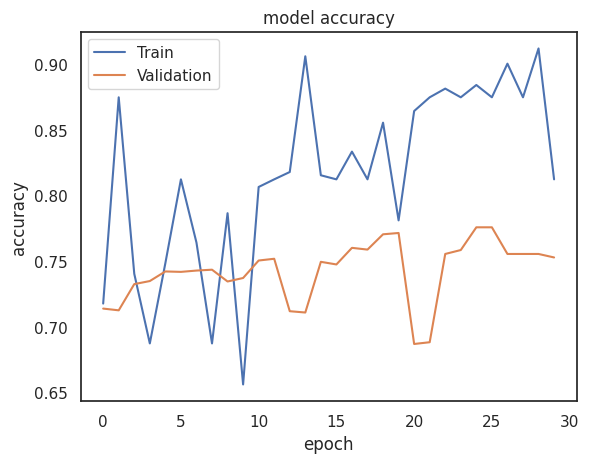

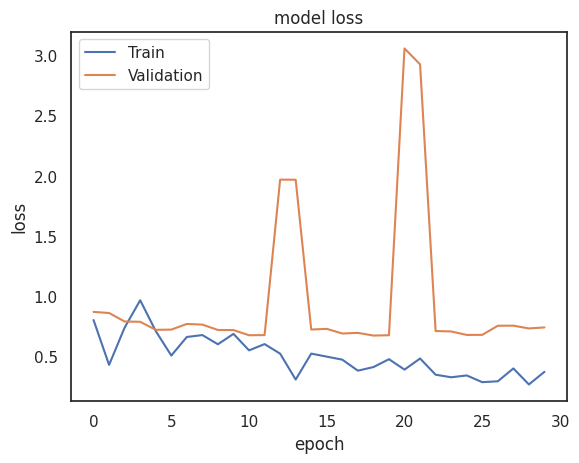

In [ ]:
plot_acc_loss(history)

In [ ]:
test_loss, test_acc = model.evaluate(test_set, steps=test_set.samples // 50)
print(f"Test Accuracy After fine tuning: {test_acc*100:.2f} %")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - acc: 0.6285 - loss: 1.1674
Test Accuracy After fine tuning: 73.75 %


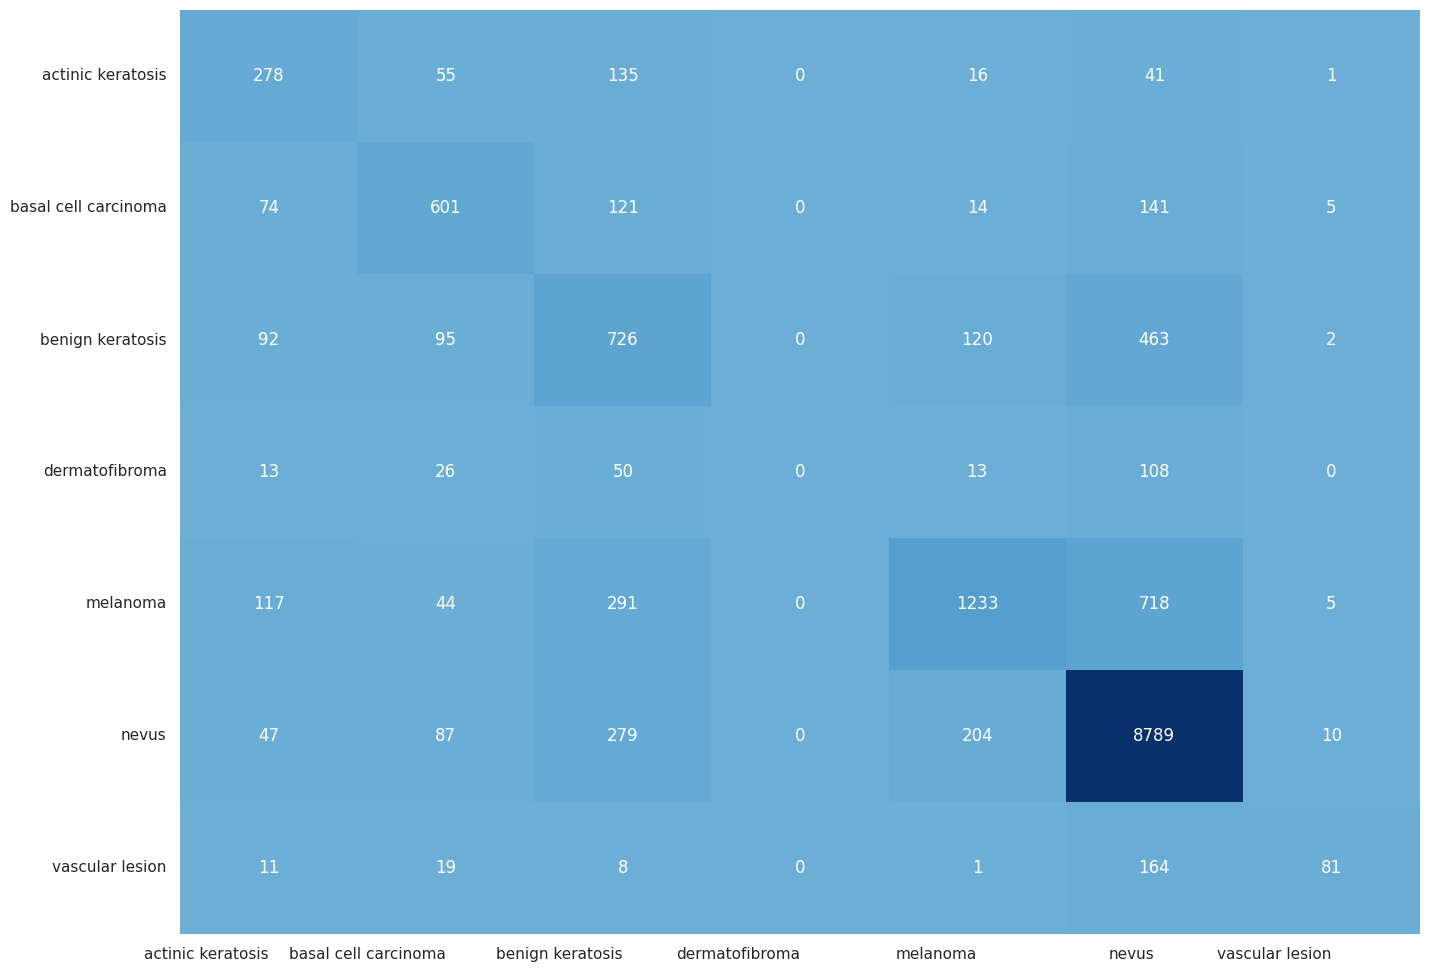

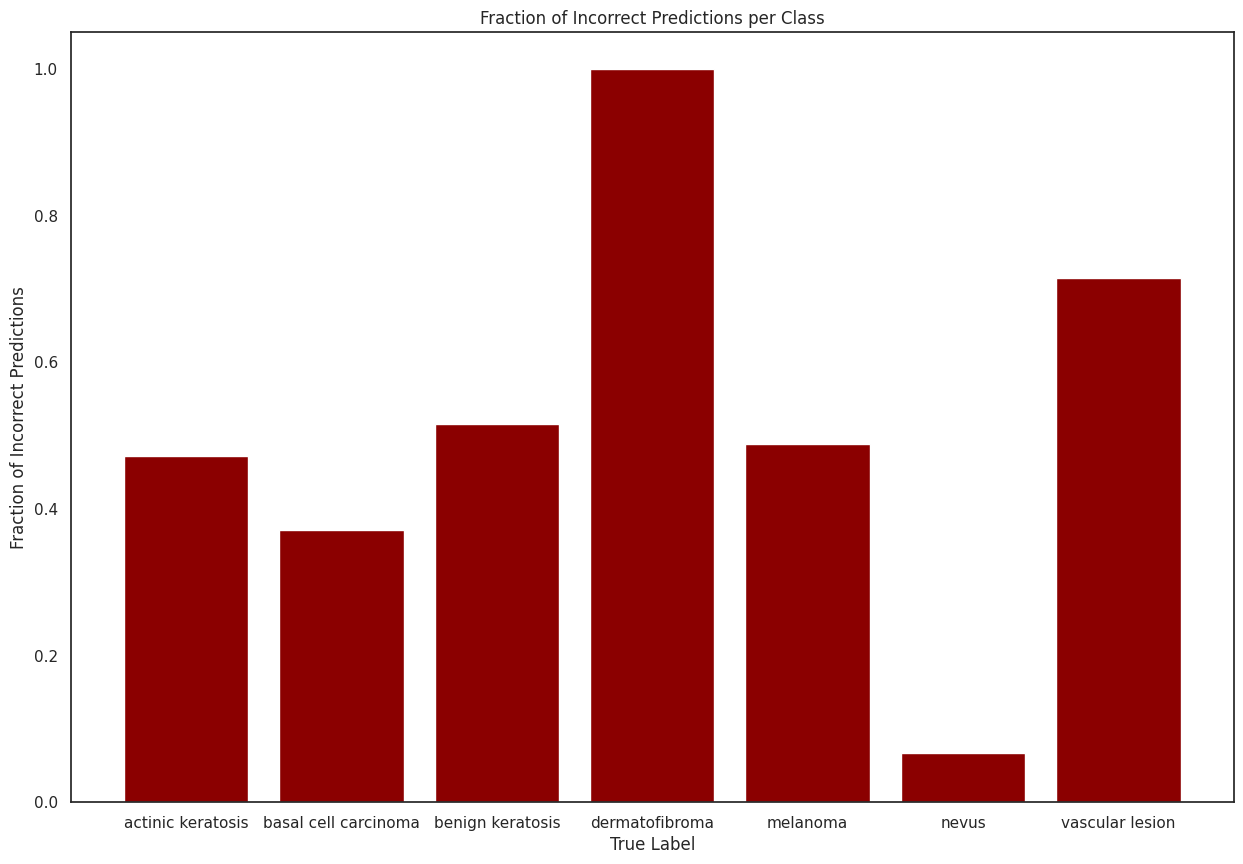

In [ ]:
class_names = {
    "akiec": "actinic keratosis",
    "bcc": "basal cell carcinoma",
    "bkl": "benign keratosis",
    "df": "dermatofibroma",
    "mel": "melanoma",
    "nv": "nevus",
    "vasc": "vascular lesion",
}
abbreviated_class_names = list(class_names.values())

# Compute the confusion matrix from true and predicted classes
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix as a heatmap with white text for annotations
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.0, style="white")

sns.heatmap(
    cm, fmt="d", annot=True, cmap="Blues", center=True, cbar=False,
    xticklabels=abbreviated_class_names, yticklabels=abbreviated_class_names,
    annot_kws={"color": "white"}
)
plt.xticks(rotation=0, ha="right")
plt.yticks(rotation=0)
plt.show()

# Plot fractional incorrect misclassifications
incorrect_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.figure(figsize=(15, 10))
plt.bar(np.arange(len(abbreviated_class_names)), incorrect_fraction, tick_label=abbreviated_class_names, color='darkred')
plt.title("Fraction of Incorrect Predictions per Class")
plt.xlabel("True Label")
plt.ylabel("Fraction of Incorrect Predictions")
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step


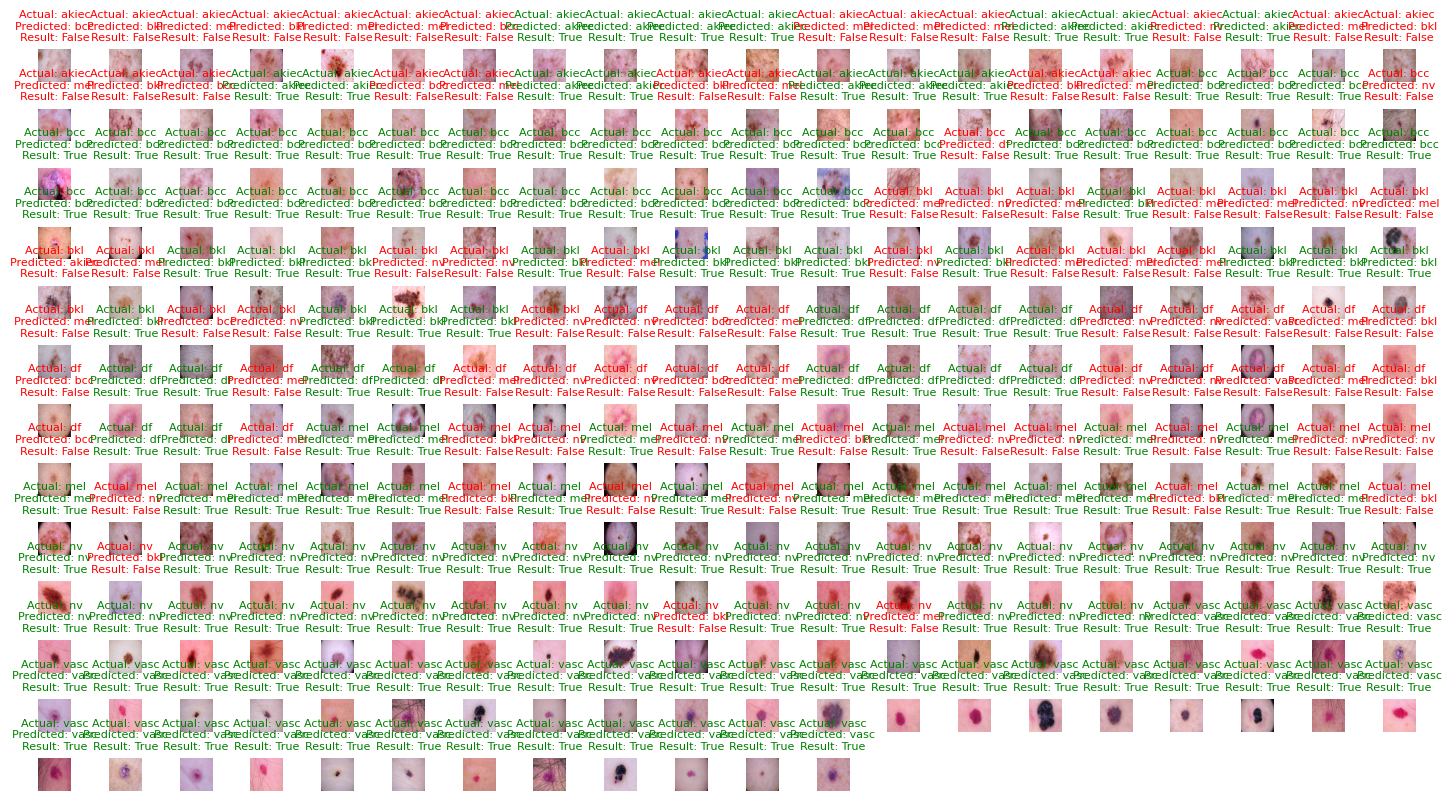

In [ ]:
class_labels = {v: k for k, v in training_set.class_indices.items()}

# Randomly sample images from all classes
num_classes = len(class_labels)
num_images = 252
samples_per_class = num_images // num_classes

selected_images = []
selected_labels = []

# For each class, sample images as available, up to samples_per_class
for class_idx in range(num_classes):
    class_images = []
    class_labels_list = []
    max_attempts = 100  # Limit the number of attempts to avoid an infinite loop
    attempts = 0

    while len(class_images) < samples_per_class and attempts < max_attempts:
        attempts += 1
        try:
            images, labels = next(test_set)  # Get the next batch from the test set

            # Handle batch sizes > 1 by iterating through each item in the batch
            for img, lbl in zip(images, labels):
                if np.argmax(lbl) == class_idx:
                    class_images.append(img)
                    class_labels_list.append(lbl)

                # Break if we have enough samples for this class
                if len(class_images) >= samples_per_class:
                    break
        except StopIteration:
            break  # Stop if there are no more images in the generator

    selected_images.extend(class_images)
    selected_labels.extend(class_labels_list)

# Convert lists to numpy arrays
selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

# Ensure we don't attempt to display more images than we loaded
num_images_to_display = min(num_images, len(selected_images))

# Get the model's predictions for the images
predictions = model.predict(selected_images)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(selected_labels, axis=1)

# Create a 6x5 grid to display up to 30 images
plt.figure(figsize=(18, 15))

for i in range(num_images_to_display):
    plt.subplot(20, 20, i + 1)  # Create a 6x5 grid
    plt.imshow(selected_images[i])
    plt.axis('off')

    actual_label_name = class_labels[actual_labels[i]]
    predicted_label_name = class_labels[predicted_labels[i]]

    # Check if the prediction is correct
    is_correct = actual_label_name == predicted_label_name
    color = 'green' if is_correct else 'red'
    plt.title(f"Actual: {actual_label_name}\nPredicted: {predicted_label_name}\nResult: {is_correct}",
              fontsize=8, color=color)

# Adjust spacing between plots to prevent text overlap
plt.subplots_adjust(wspace=0.4, hspace=0.8)

# Show the plot
plt.show()